<a href="https://colab.research.google.com/github/Pratiksha34-4patil/Data-Analyse/blob/main/Mall_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns =(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[()$]", '', regex =True)
    .str.replace("_","_")
    .str.replace(" ","_")
)

In [5]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income_k',
       'spending_score_1-100'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerid            200 non-null    int64 
 1   gender                200 non-null    object
 2   age                   200 non-null    int64 
 3   annual_income_k       200 non-null    int64 
 4   spending_score_1-100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,customerid,age,annual_income_k,spending_score_1-100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#selecting feature

x = df[['annual_income_k','spending_score_1-100']]
x.head()

,annual_income_k,spending_score_1-100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


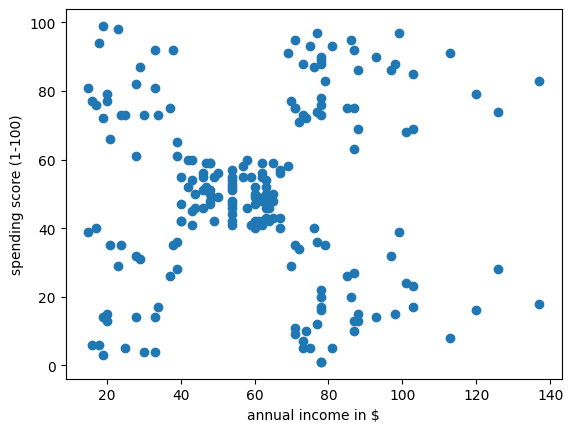

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x["annual_income_k"],x['spending_score_1-100'])
plt.xlabel("annual income in $")
plt.ylabel("spending score (1-100)")
plt.show()

In [ ]:
# since there is no label, the model can use only is distance between points

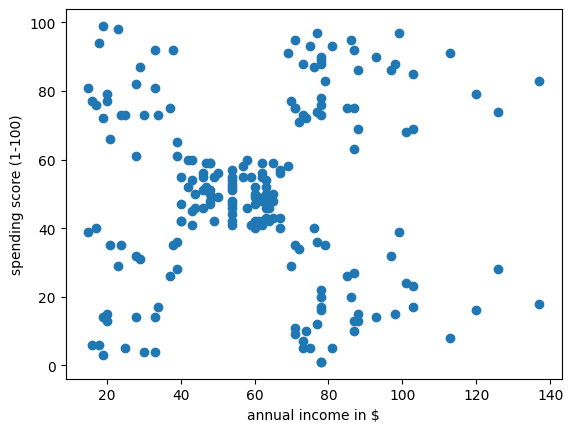

In [10]:
# visualising raw data
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x["annual_income_k"],x['spending_score_1-100'])
plt.xlabel("annual income in $")
plt.ylabel("spending score (1-100)")
plt.show()

In [11]:
#k means clustering
#k means tries to group pointer so the points in the
#same group are close to each other
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state=42)
labels = kmeans.fit_predict(x)


# n_cluster ,divide the customer into 5 groups
# fit(x) - look at all data pionts in x,place
#5 random centroids
#assigns each point to center of assigned points in
#iteration
#repeats untill stable
#for each data point returns which cluster it belongs to
#represents them with numeric value

In [12]:
labels[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [13]:
df["cluster"] = labels
df.head()

,customerid,gender,age,annual_income_k,spending_score_1-100,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [14]:
# elbow method

from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

  #wcc- withine cluster sum of squence
  #lower wcss - tightly clusters
  #higher wcc - messy  cluster
  #we will soter this for ecah KMeans
  #each loop -new model -different number of clusters

  #in each loop k increases,wcc decreases and improvement
  #slows down after certain point




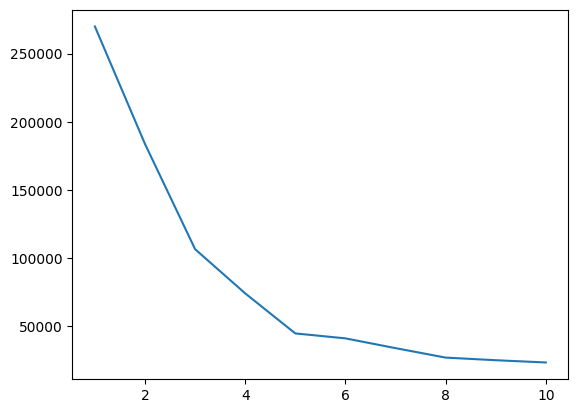

In [15]:
plt.plot(range(1,11),wcss)

In [16]:
kmeans=KMeans(n_clusters=10,random_state=42)
labels = kmeans.fit_predict(x)

In [17]:
labels[:10]

array([6, 3, 4, 3, 6, 3, 4, 3, 4, 3], dtype=int32)

In [18]:
x = df[['annual_income_k','spending_score_1-100']]
x.head()

,annual_income_k,spending_score_1-100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


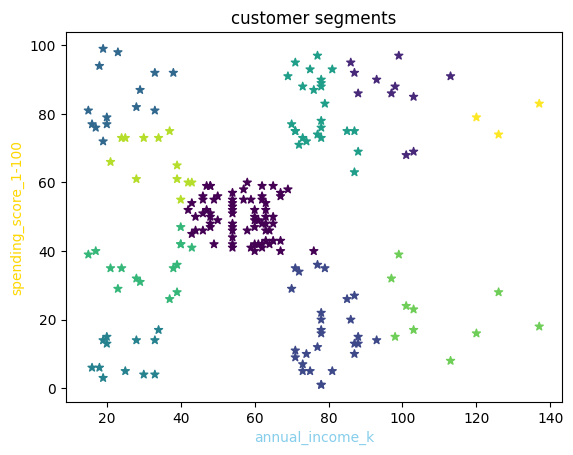

In [19]:
# #visualize clusters
plt.scatter(
    x['annual_income_k'],
    x['spending_score_1-100'],
    marker="*",
    c=labels
)

plt.xlabel('annual_income_k',color="skyblue")
plt.ylabel('spending_score_1-100',color="gold")
plt.title('customer segments')
plt.show()

In [20]:
# applying PCA here
# Principal Compound Analysis - PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# components = 2 - reducing data 2 dimensions,
# information preserved mostly

#PCA are used when data has many feature, so pca compress information then we visualize it
#pca does not create clusters, it helps us them

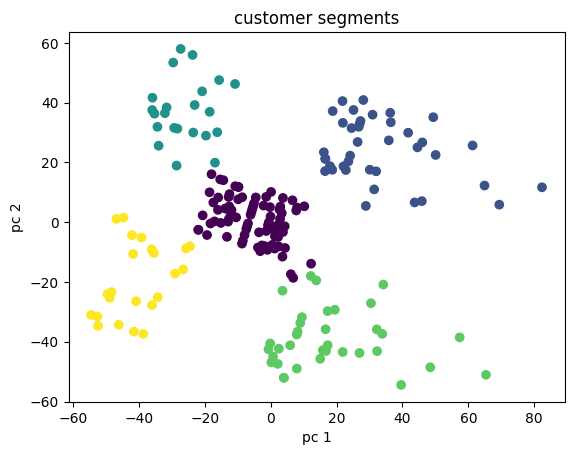

In [21]:
#visualize clusters using PCA

plt.scatter(
    x_pca[:,0],
    x_pca[:,1],
    c=df['cluster']

)

plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.title('customer segments')
plt.show()

In [22]:
df.groupby('cluster')[['annual_income_k','spending_score_1-100']].mean()

,annual_income_k,spending_score_1-100
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [23]:
df['segment'] = df['cluster'].map({
    0: 'mid income - mid spend',
    1: 'high imcome - high spend',
    2: 'low income - high spend',
    3: 'high income - low spend',
    4: 'low income - low spend'
})

In [24]:
df.head()

,customerid,gender,age,annual_income_k,spending_score_1-100,cluster,segment
0,1,Male,19,15,39,4,low income - low spend
1,2,Male,21,15,81,2,low income - high spend
2,3,Female,20,16,6,4,low income - low spend
3,4,Female,23,16,77,2,low income - high spend
4,5,Female,31,17,40,4,low income - low spend


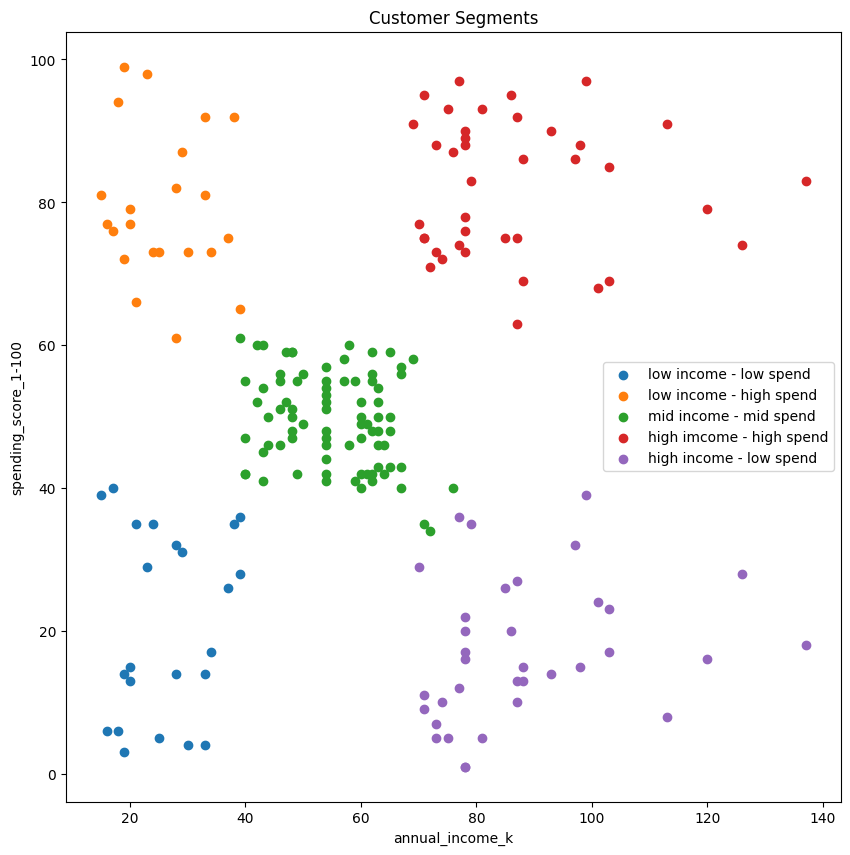

In [25]:
plt.figure(figsize=(10,10))
for segment_name,cluster_id in df[['segment','cluster']].drop_duplicates().itertuples(index=False):
    subset = df[df['cluster'] == cluster_id]
    plt.scatter(
        subset['annual_income_k'],
        subset['spending_score_1-100'],
        label=segment_name
    )
plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1-100')
plt.legend()
plt.title('Customer Segments')
plt.show()

In [26]:
#car - red,yellow,orange, 26k 40k 50k
#car. red yellow orange cost
#car.  1.   2.     3.    26k
#car.   0.  1.     0.    40k
#car.   0.  1.     1.    50k

In [ ]:
#more aprroved or rejected?
#ber chart of loan status
#box plot for loan amount
#which group has higher loan approval
#which feature looks importance for loan approval